# Que2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("dirty_iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  140 non-null    float64
 1   Sepal.Width   133 non-null    float64
 2   Petal.Length  131 non-null    float64
 3   Petal.Width   138 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


In [5]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [6]:
# i) Calculate the number and percentage of observations that are complete.
df.isna().sum()

Sepal.Length    10
Sepal.Width     17
Petal.Length    19
Petal.Width     12
Species          0
dtype: int64

In [11]:
df1 = df.dropna()

In [12]:
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
7,5.9,3.0,5.1,1.8,virginica


In [13]:
num1 = df1.shape
num = df.shape

In [14]:
num1 = list(num1)
num = list(num)
print("Number of observations that are complete : ", num1[0])
print("Percentage of observations that are complete : ", (num1[0]/num[0])*100)

Number of observations that are complete :  96
Percentage of observations that are complete :  64.0


In [15]:
# ii) replace all the special values in data with NA.

df.iloc[:,:4] = df.iloc[:,:4].replace(np.inf, 0)
df.iloc[:,:4] = df.iloc[:,:4].replace(np.nan, 0)

df.iloc[:,4] = df.iloc[:,4].replace(np.inf, np.nan)

In [16]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,0.0,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [17]:
# # Define these rules in a separate text file and read them.

# """
#     Print the resulting constraint object.
#     - Species should be one of the following values: setosa, versicolort, virginica.
#     - All measured numerical properties of an iris shouls be positive
#     - The petal length of an iris is at least 2 rimes its petal width
#     - The sepal length of an iris cannot exceed 30 cm
#     - The sepals of an iris are longer than its petals.
# """

rule1 = df['Species'].apply(lambda x:True if x=='setosa' or x=="versicolor" or x=='virginica' else False)
rule2 = df.iloc[:, :4].apply(lambda x: True if all(y > 0 for y in x) else False, axis=1)
rule3 = df.apply(lambda x:True if x["Petal.Length"]>=x['Petal.Width'] else False, axis=1)
rule4 = df['Sepal.Length'].apply(lambda x:True if x<=30 else False)
rule5 = df.apply(lambda x:True if x["Sepal.Length"]>x['Petal.Length'] else False, axis=1)

In [18]:
rule1

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Species, Length: 150, dtype: bool

In [19]:
rule2

0       True
1       True
2      False
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149    False
Length: 150, dtype: bool

In [20]:
rule3

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

In [21]:
rule4

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Sepal.Length, Length: 150, dtype: bool

In [22]:
rule5

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool

In [23]:
rules={'Rule1':"""print(df['Species'].apply(lambda x: x in ['versicolor','virginica','setosa']))""", 'Rule2':"""print(df1.apply(lambda x: x if x['Petal.Length']>=2*x['Petal.Width'] else 0, axis=1))""",'Rule3':"""print(df1.apply(lambda x: x if x['Sepal.Length']<=30 else 0, axis=1))""",'Rule4':"""print(df1.apply(lambda x: x if x['Sepal.Length']>x['Petal.Length'] else 0, axis=1))""", 'Rule5':"""print(df.apply(lambda x:True if x["Sepal.Length"]>x['Petal.Length'] else False, axis=1))"""}

In [24]:
!pip install json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [25]:
import json

In [26]:
json_object = json.dumps(rules) 
print(json_object)

{"Rule1": "print(df['Species'].apply(lambda x: x in ['versicolor','virginica','setosa']))", "Rule2": "print(df1.apply(lambda x: x if x['Petal.Length']>=2*x['Petal.Width'] else 0, axis=1))", "Rule3": "print(df1.apply(lambda x: x if x['Sepal.Length']<=30 else 0, axis=1))", "Rule4": "print(df1.apply(lambda x: x if x['Sepal.Length']>x['Petal.Length'] else 0, axis=1))", "Rule5": "print(df.apply(lambda x:True if x[\"Sepal.Length\"]>x['Petal.Length'] else False, axis=1))"}


In [27]:
with open("sample.json", "w") as outfile:
    json.dump(rules, outfile)

In [28]:
with open('sample.json') as f:
   data = json.load(f)

print(exec(data['Rule1']))
# same other rules

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Species, Length: 150, dtype: bool
None


In [29]:
# iv) Determine how often each rule is broken (violatedEdits). ALso summarize and plot the result.

df_rules = pd.DataFrame({"Rule1":rule1, "Rule2":rule2 ,"Rule3":rule3, "Rule4":rule4, "Rule5":rule5})
df_rules

,Rule1,Rule2,Rule3,Rule4,Rule5
0,True,True,True,True,True
1,True,True,True,True,True
2,True,False,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
145,True,True,True,True,True
146,True,True,True,True,True
147,True,True,True,True,True
148,True,False,False,True,True


In [30]:
df_rules.describe()

,Rule1,Rule2,Rule3,Rule4,Rule5
count,150,150,150,150,150
unique,1,2,2,2,2
top,True,True,True,True,True
freq,150,92,129,148,138


In [31]:
df_rules = df_rules.astype(int)
df_rules.describe()

,Rule1,Rule2,Rule3,Rule4,Rule5
count,150.0,150.000000,150.000000,150.000000,150.000000
mean,1.0,0.613333,0.860000,0.986667,0.920000
std,0.0,0.488618,0.348149,0.115082,0.272202
min,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,1.000000,1.000000,1.000000
50%,1.0,1.000000,1.000000,1.000000,1.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000


<Axes: >

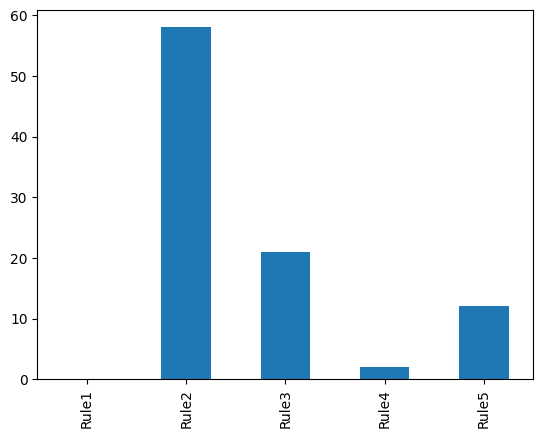

In [32]:
df_rules.apply(lambda x:len(x) - x.sum()).plot(kind='bar')

<Axes: >

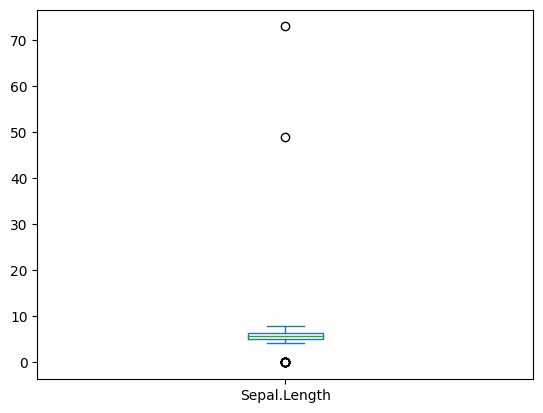

In [33]:
#v). Find outliers in sepal length using boxplot and boxplot.stats

df["Sepal.Length"].plot(kind="box")

In [34]:
quantile = df["Sepal.Length"].quantile([0.0, 0.25, 0.5, 0.75, 1])

In [35]:
quantile

0.00     0.0
0.25     5.0
0.50     5.7
0.75     6.4
1.00    73.0
Name: Sepal.Length, dtype: float64

In [36]:
df["Sepal.Length"].describe()

count    150.000000
mean       6.122000
std        6.770791
min        0.000000
25%        5.000000
50%        5.700000
75%        6.400000
max       73.000000
Name: Sepal.Length, dtype: float64